In [2]:
import os

# Add root directory to python path
import sys
from tqdm import tqdm
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.cmesrc.utils import filepaths_updated_swan_data

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

In [3]:
SWAN = filepaths_updated_swan_data()


==CACHING SWAN DATA.==



100%|██████████| 4098/4098 [00:00<00:00, 1230809.72it/s]

In [94]:
mean_dlons = []
mean_dlats = []
std_dlons = []
std_dlats = []
suspicious = []

for harpnum, filepath in tqdm(SWAN.items()):
    df = pd.read_csv(filepath, sep="\t")

    df["CENTRE_LON"] = (df["LONDTMIN"] + df["LONDTMAX"]) / 2
    df["CENTRE_LAT"] = (df["LATDTMIN"] + df["LATDTMAX"]) / 2

    diff_lon = np.diff(df["CENTRE_LON"])
    diff_lat = np.diff(df["CENTRE_LAT"])

    if np.any(np.any(np.where(np.abs(diff_lon) > 10)) or np.any(np.where(np.abs(diff_lon) > 1))):
        suspicious.append(harpnum)

    mean_dlons.append(np.nanmean(diff_lon))
    mean_dlats.append(np.nanmean(diff_lon))
    std_dlons.append(np.nanstd(diff_lon))
    std_dlats.append(np.nanstd(diff_lat))

 50%|█████     | 2050/4098 [00:10<00:09, 207.42it/s]/tmp/ipykernel_170666/486165651.py:19: RuntimeWarning: Mean of empty slice
  mean_dlons.append(np.nanmean(diff_lon))
/tmp/ipykernel_170666/486165651.py:20: RuntimeWarning: Mean of empty slice
  mean_dlats.append(np.nanmean(diff_lon))
/home/julio/cmesrc/env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
100%|██████████| 4098/4098 [00:22<00:00, 185.94it/s]


In [11]:
import seaborn as sns

<AxesSubplot: >

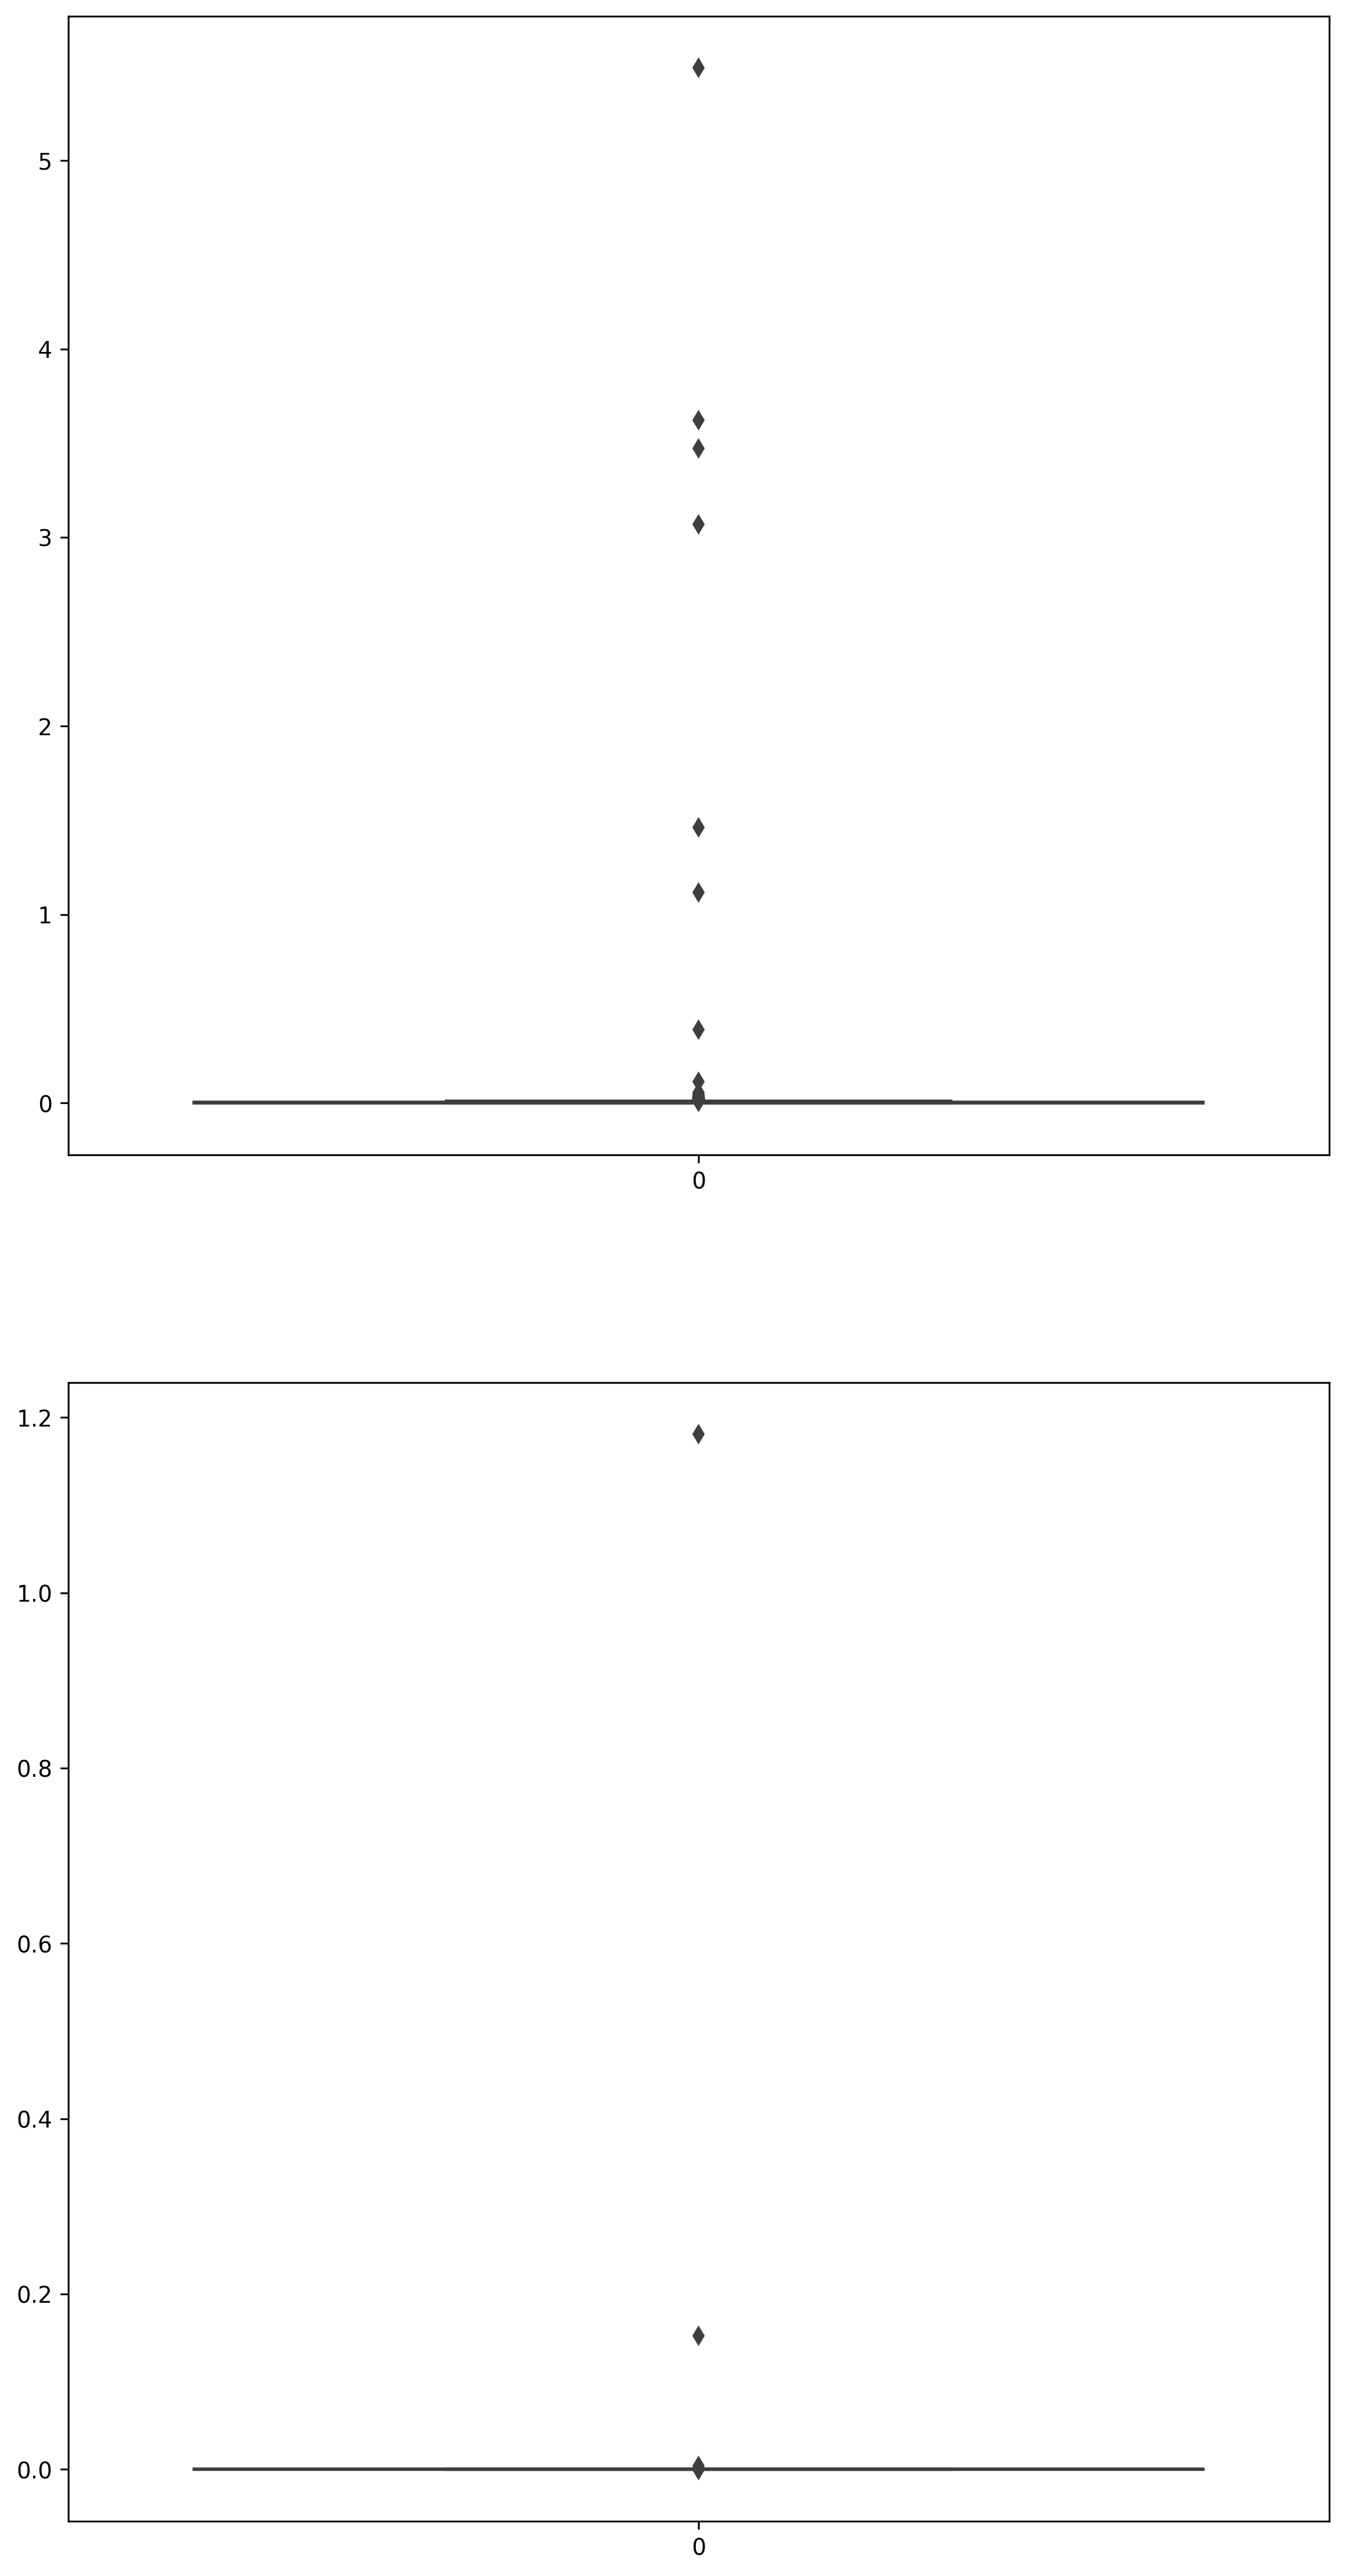

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(10,20), dpi=300)

sns.boxplot(std_dlons, ax = ax[0])
sns.boxplot(std_dlats, ax = ax[1])

In [87]:
lon95p = np.nanpercentile(std_dlons, 99)
lon5p = np.nanpercentile(std_dlons, 0)

lat95p = np.nanpercentile(std_dlats, 99)
lat5p = np.nanpercentile(std_dlats, 0)

In [88]:
lon_outliers = np.where(std_dlons > lon95p) or np.where(std_dlons < lon5p)
lon_outliers

(array([  60,   73,  546,  687,  749,  857,  886, 1015, 1087, 1164, 1203,
        1371, 1470, 1557, 1662, 1830, 1840, 1955, 1995, 1999, 2076, 2089,
        2270, 2331, 2460, 2515, 2647, 2826, 2858, 2882, 2977, 3082, 3139,
        3209, 3275, 3491, 3627, 3749, 3867, 3919, 4060]),)

In [89]:
lat_outliers = np.where(std_dlats > lat95p) or np.where(std_dlats < lat5p)
lat_outliers

(array([  73,   96,  419,  476,  849,  871,  909,  922,  958, 1193, 1386,
        1540, 1557, 1646, 1776, 1927, 2034, 2067, 2136, 2232, 2255, 2270,
        2501, 2528, 2641, 2668, 2882, 2991, 3183, 3214, 3249, 3259, 3260,
        3275, 3493, 3507, 3616, 3858, 3955, 3988, 4060]),)

In [90]:
harpnums = np.array(list(SWAN.keys()))
harpnums

array([7288, 1979,  667, ..., 5718,   83,  747])

In [91]:
lon_outlier_harpnums = harpnums[lon_outliers[0]]
lon_outlier_harpnums

array([3538, 2234, 3556, 7302, 1460, 6131, 5191, 5945,  876, 2506, 4638,
       2109, 7109, 2116, 1453, 2107, 1420,  931,  140, 6980,  431, 2233,
       6119, 2329, 1076, 7301, 2112, 3152, 2015, 2106, 7258, 2114, 7256,
       3292, 2115, 1419, 6425,  771, 1177,  776, 2113])

In [92]:
lat_outlier_harpnums = harpnums[lat_outliers[0]]

In [96]:
import shutil

for lon_outlier_harpnum in lon_outlier_harpnums:
    filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/{lon_outlier_harpnum}.png"

    new_filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/lon_outliers/{lon_outlier_harpnum}.png"

    shutil.copy(filepath, new_filepath)

for lat_outlier_harpnum in lat_outlier_harpnums:
    filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/{lat_outlier_harpnum}.png"

    new_filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/lat_outliers/{lat_outlier_harpnum}.png"

    shutil.copy(filepath, new_filepath)

for harpnum in suspicious:
    filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/{harpnum}.png"

    new_filepath = f"/home/julio/cmesrc/notebooks/figures/bboxes/suspicious/{harpnum}.png"

    shutil.copy(filepath, new_filepath)


